In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset 1 V2 (85:15)
#  Ensemble Acc 99%
# CNN Acc 99%
# Eff ACC 96%
# Dense ACC 98%

In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/Alzheimers-ADNI/train"
VAL_PATH = "/content/drive/MyDrive/Alzheimers-ADNI/test"

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

import cv2
from tqdm import tqdm
import io
import seaborn as sns

from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard,ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.utils.vis_utils import plot_model

import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

In [ ]:
labels = ['Final AD JPEG','Final CN JPEG', 'Final EMCI JPEG', 'Final LMCI JPEG','Final MCI JPEG']

In [ ]:
X_train = [] #Training Dataset
Y_train = [] #Training Labels
X_test = [] #Testing Dataset
Y_test = [] #Testing Labels


In [ ]:
image_size=150

for i in labels:
    folderPath = os.path.join(TRAIN_PATH, i)
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)


for j in labels:
    folderPath = os.path.join(VAL_PATH, j)
    for k in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, k))
        image = cv2.resize(image, (image_size, image_size))
        X_test.append(image)
        Y_test.append(j)

100%|██████████| 233/233 [00:01<00:00, 142.91it/s]


In [ ]:


# converted into array

Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)
Xtest = np.array(X_test)
Ytest = np.array(Y_test)

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(15312, 150, 150, 3)
(15312,)
(2575, 150, 150, 3)
(2575,)


DENSENET


In [ ]:
ytrain_new = []
ytest_new = []

for i in Ytrain:
    ytrain_new.append(labels.index(i))#Converting String Label to integer i.e

Ytrain = to_categorical(ytrain_new) #Converts a class vector (integers) to binary class matrix

for i in Ytest:
    ytest_new.append(labels.index(i))

Ytest = to_categorical(ytest_new)

DENSENET


In [ ]:
image_size=150
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(image_size, image_size, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf

.

model = model_d.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(5, activation='softmax')(model)
model = tf.keras.models.Model(inputs=model_d.input, outputs=model)




In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc')
]

In [ ]:
model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
history=model.fit(Xtrain,Ytrain,epochs=50,validation_data=(Xtest,Ytest))

Epoch 1/50
479/479 [==============================] - 172s 200ms/step - loss: 0.0641 - accuracy: 0.9927 - precision: 0.9835 - recall: 0.9799 - auc: 0.9984 - val_loss: 0.0960 - val_accuracy: 0.9880 - val_precision: 0.9771 - val_recall: 0.9623 - val_auc: 0.9987
Epoch 2/50
479/479 [==============================] - 89s 186ms/step - loss: 0.0457 - accuracy: 0.9940 - precision: 0.9862 - recall: 0.9840 - auc: 0.9991 - val_loss: 0.4614 - val_accuracy: 0.9516 - val_precision: 0.8864 - val_recall: 0.8695 - val_auc: 0.9754
Epoch 3/50
479/479 [==============================] - 90s 187ms/step - loss: 0.0277 - accuracy: 0.9966 - precision: 0.9921 - recall: 0.9909 - auc: 0.9997 - val_loss: 0.0484 - val_accuracy: 0.9931 - val_precision: 0.9837 - val_recall: 0.9817 - val_auc: 0.9997
Epoch 4/50
479/479 [==============================] - 89s 187ms/step - loss: 0.0297 - accuracy: 0.9957 - precision: 0.9898 - recall: 0.9888 - auc: 0.9995 - val_loss: 0.1956 - val_accuracy: 0.9765 - val_precision: 0.9462 - 

In [ ]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/DENSE_FINAL2.csv', index=False)

# Save the model itself
model.save('/content/sample_data/DENSE_FINAL2.h5')

In [ ]:
labels_final = ['AD','CN','EMCI','LMCI','MCI']

In [ ]:
labels = ['Final AD JPEG','Final CN JPEG', 'Final EMCI JPEG', 'Final LMCI JPEG','Final MCI JPEG']

In [ ]:
labels = ['Final AD JPEG','Final CN JPEG', 'Final EMCI JPEG', 'Final LMCI JPEG','Final MCI JPEG']

In [ ]:
pred = model.predict(Xtest)
pred = np.argmax(pred, axis=1)
actual_label = np.argmax(Ytest, axis=1)
print(classification_report(actual_label, pred , target_names = labels))

81/81 [==============================] - 3s 42ms/step
                 precision    recall  f1-score   support

  Final AD JPEG       1.00      0.98      0.99       810
  Final CN JPEG       1.00      0.99      1.00      1220
Final EMCI JPEG       0.96      1.00      0.98       240
Final LMCI JPEG       0.97      1.00      0.99        72
 Final MCI JPEG       0.95      1.00      0.97       233

       accuracy                           0.99      2575
      macro avg       0.98      0.99      0.98      2575
   weighted avg       0.99      0.99      0.99      2575



In [ ]:
accuracy_score(actual_label, pred)

0.989126213592233

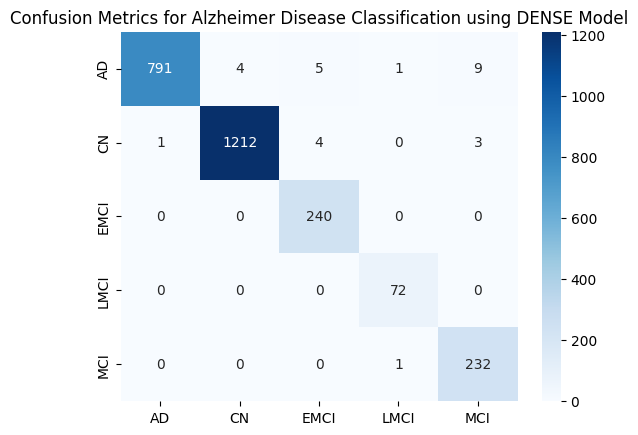

In [ ]:
Cm1=confusion_matrix(actual_label,pred)
ax1=plt.axes()
sns.heatmap(Cm1, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels_final,
           yticklabels=labels_final,
           ax=ax1
           )

plt.title("Confusion Metrics for Alzheimer Disease Classification using DENSE Model")
plt.savefig('DENSE_confusion.png', dpi=300) # Save plot as PNG
plt.show()

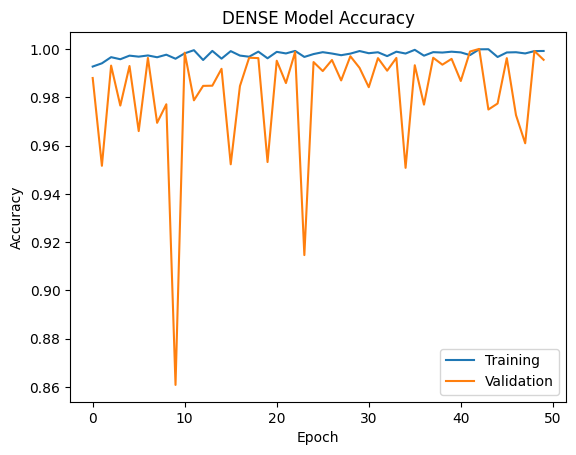

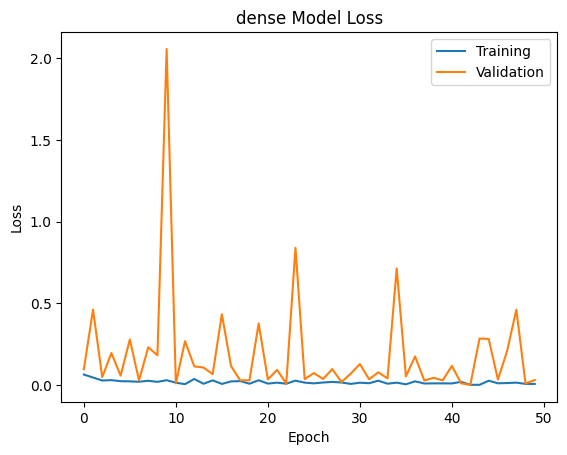

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DENSE Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('dense_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('dense Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('dense_loss.png', dpi=300) # Save plot as PNG
plt.show()

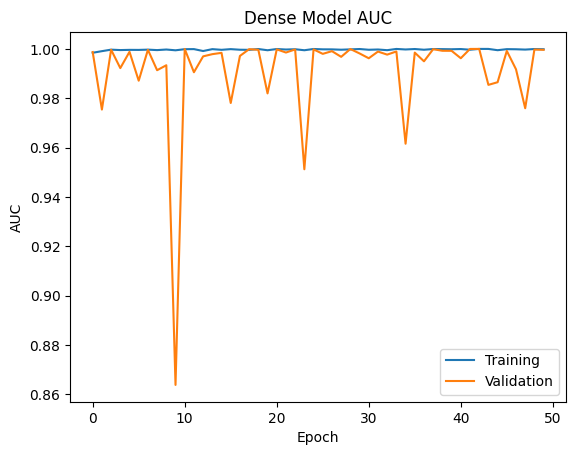

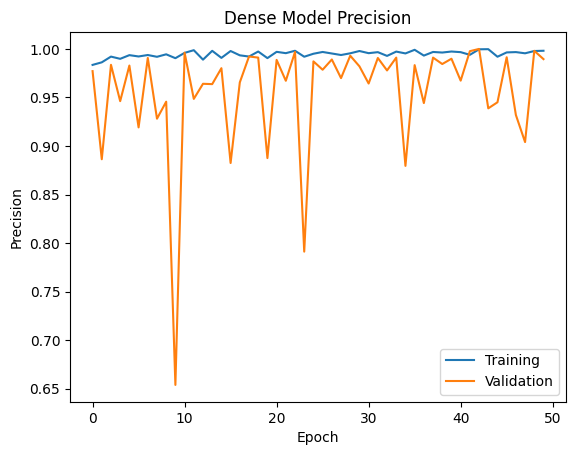

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Dense Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('Dense_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Dense Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('Dense_precision.png', dpi=300) # Save plot as PNG
plt.show()

CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


In [ ]:
#Create the model
cnn=Sequential()
#initially 64 convolution nodes
cnn.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=(image_size, image_size, 3)))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 32 convolution nodes
cnn.add(Conv2D(32,(3,3),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 32 convolutions
cnn.add(Conv2D(32,(2,2),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 100 nodes
cnn.add(Dense(100,activation='relu'))
#Add another hidden layer with 50 nodes
cnn.add(Dense(50,activation='relu'))
#Add final output layer with 4 output nodes using softmax
cnn.add(Dense(5,activation='softmax'))

In [ ]:
cnn.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
model1.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
cnn.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [ ]:
history1=cnn.fit(Xtrain,Ytrain,epochs=50,validation_data=(Xtest,Ytest))

Epoch 1/50
479/479 [==============================] - 22s 33ms/step - loss: 0.8616 - accuracy: 0.8607 - precision: 0.6745 - recall: 0.5866 - auc: 0.9159 - val_loss: 1.0012 - val_accuracy: 0.8372 - val_precision: 0.6664 - val_recall: 0.3724 - val_auc: 0.8615
Epoch 2/50
479/479 [==============================] - 12s 25ms/step - loss: 0.5388 - accuracy: 0.9068 - precision: 0.7895 - recall: 0.7281 - auc: 0.9587 - val_loss: 0.8842 - val_accuracy: 0.8642 - val_precision: 0.7689 - val_recall: 0.4586 - val_auc: 0.8959
Epoch 3/50
479/479 [==============================] - 12s 25ms/step - loss: 0.4075 - accuracy: 0.9328 - precision: 0.8503 - recall: 0.8057 - auc: 0.9770 - val_loss: 0.7246 - val_accuracy: 0.8934 - val_precision: 0.8012 - val_recall: 0.6214 - val_auc: 0.9316
Epoch 4/50
479/479 [==============================] - 12s 25ms/step - loss: 0.2875 - accuracy: 0.9553 - precision: 0.9022 - recall: 0.8706 - auc: 0.9886 - val_loss: 0.5590 - val_accuracy: 0.9171 - val_precision: 0.8994 - val_r

In [ ]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history1.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/CNN_FINAL2.csv', index=False)

# Save the model itself
model.save('/content/sample_data/CNN_FINAL2.h5')

In [ ]:
history1 = model1.load_weights('/content/sample_data/cnn.h5')


In [ ]:
pred1 = cnn.predict(Xtest)
pred1 = np.argmax(pred1, axis=1)
actual_label1 = np.argmax(Ytest, axis=1)
print(classification_report(actual_label1, pred1 , target_names = labels_final))

81/81 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

          AD       1.00      1.00      1.00       810
          CN       1.00      1.00      1.00      1220
        EMCI       0.99      0.99      0.99       240
        LMCI       0.96      1.00      0.98        72
         MCI       1.00      0.99      0.99       233

    accuracy                           1.00      2575
   macro avg       0.99      0.99      0.99      2575
weighted avg       1.00      1.00      1.00      2575



In [ ]:
accuracy_score(actual_label1, pred1)

0.996116504854369

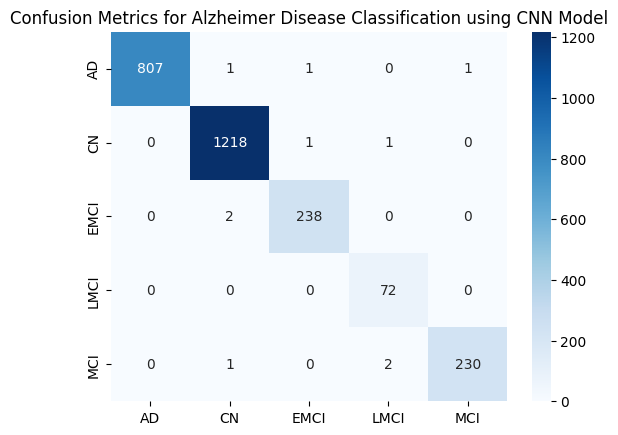

In [ ]:
Cm1=confusion_matrix(actual_label1,pred1)
ax1=plt.axes()
sns.heatmap(Cm1, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels_final,
           yticklabels=labels_final,
           ax=ax1
           )

plt.title("Confusion Metrics for Alzheimer Disease Classification using CNN Model")
plt.savefig('cnn_confusion.png', dpi=300) # Save plot as PNG
plt.show()

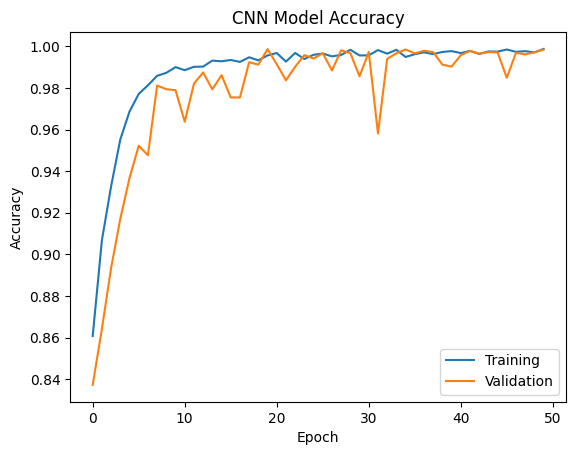

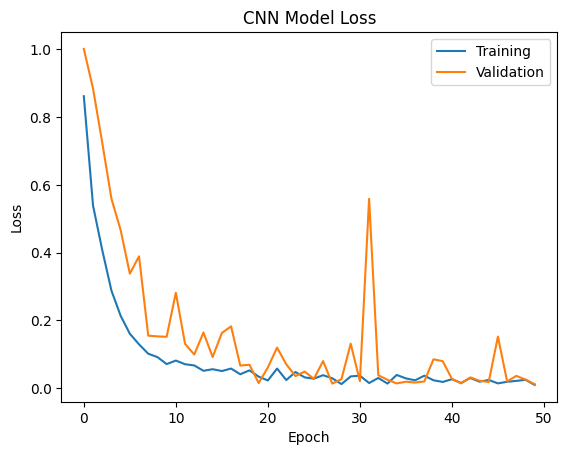

In [ ]:
# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_loss.png', dpi=300) # Save plot as PNG
plt.show()

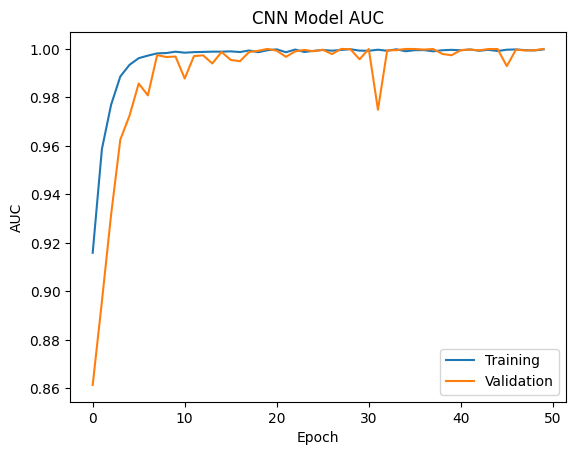

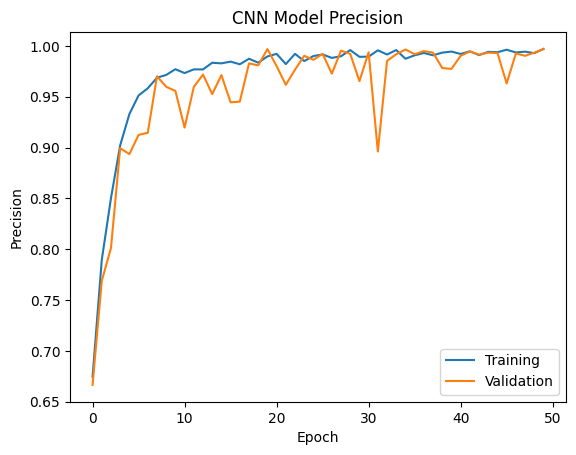

In [ ]:
# Plot the training and validation auc
plt.plot(history1.history['auc'])
plt.plot(history1.history['val_auc'])
plt.title('CNN Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history1.history['precision'])
plt.plot(history1.history['val_precision'])
plt.title('CNN Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_precision.png', dpi=300) # Save plot as PNG
plt.show()

EfficientNetB7


In [ ]:
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
efficientnetB7= EfficientNetB7(include_top=False,weights='imagenet',input_shape=(image_size, image_size, 3))

Exception ignored in: <function _xla_gc_callback at 0x781b1722bd00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
# Output of model

model2 = efficientnetB7.output
model2 = tf.keras.layers.GlobalAveragePooling2D()(model2)
model2 = tf.keras.layers.Dropout(0.5)(model2)
model2 = tf.keras.layers.Dense(5, activation='softmax')(model2)
model2 = tf.keras.models.Model(inputs=efficientnetB7.input, outputs=model2)

In [ ]:
model2.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
history2 = model2.load_weights('/content/drive/MyDrive/Model Training/efficientb7.h5')
#history2=model2.fit(Xtrain,Ytrain,epochs=50,validation_data=(Xtest,Ytest))

In [ ]:
pred2 = model2.predict(Xtest)
pred2 = np.argmax(pred2, axis=1)
actual_label2 = np.argmax(Ytest, axis=1)
print(classification_report(actual_label2, pred2,target_names = labels_final))

81/81 [==============================] - 19s 175ms/step
              precision    recall  f1-score   support

          AD       0.97      0.98      0.98       810
          CN       0.97      0.97      0.97      1220
        EMCI       0.94      0.88      0.91       240
        LMCI       0.90      0.86      0.88        72
         MCI       0.88      0.91      0.90       233

    accuracy                           0.96      2575
   macro avg       0.93      0.92      0.93      2575
weighted avg       0.96      0.96      0.96      2575



In [ ]:
accuracy_score(actual_label2, pred2)

0.9588349514563107

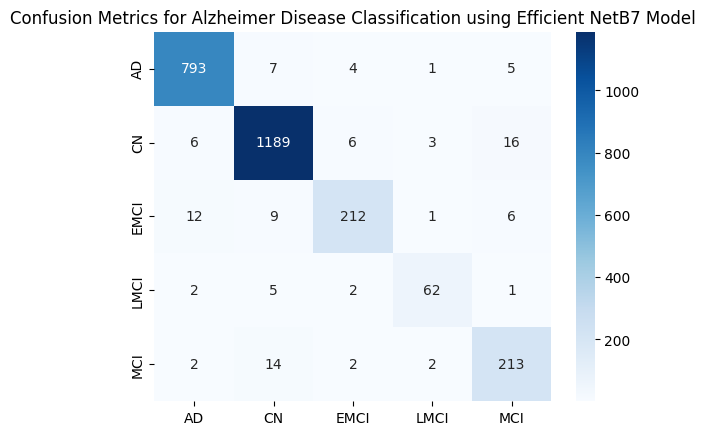

In [ ]:
Cm2=confusion_matrix(actual_label2,pred2)
ax2=plt.axes()
sns.heatmap(Cm2, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels_final,
           yticklabels=labels_final,
           ax=ax2
           )

plt.title("Confusion Metrics for Alzheimer Disease Classification using Efficient NetB7 Model")
plt.savefig('netb7_confusion.png', dpi=300) # Save plot as PNG
plt.show()

In [ ]:
import pickle

with open('/content/drive/MyDrive/Model Training/efficientb7_history.pkl', 'rb') as f:
    history2 = pickle.load(f)


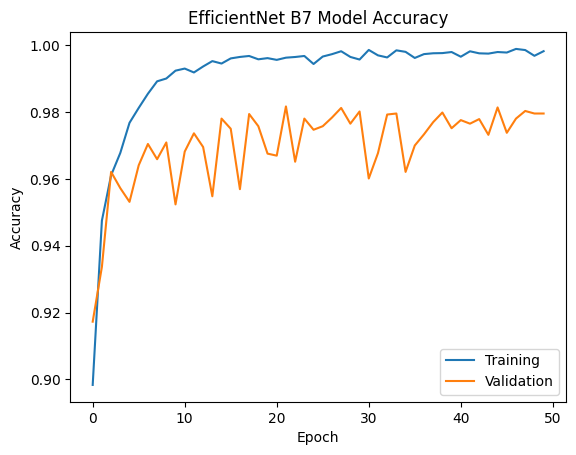

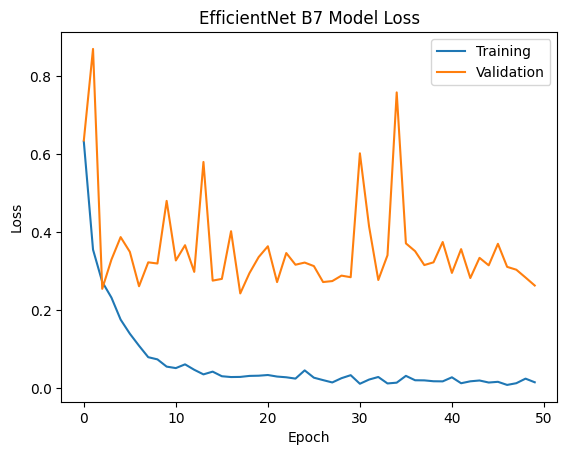

In [ ]:
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('EfficientNet B7 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('netb7_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('EfficientNet B7 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('netb7_loss.png', dpi=300) # Save plot as PNG
plt.show()

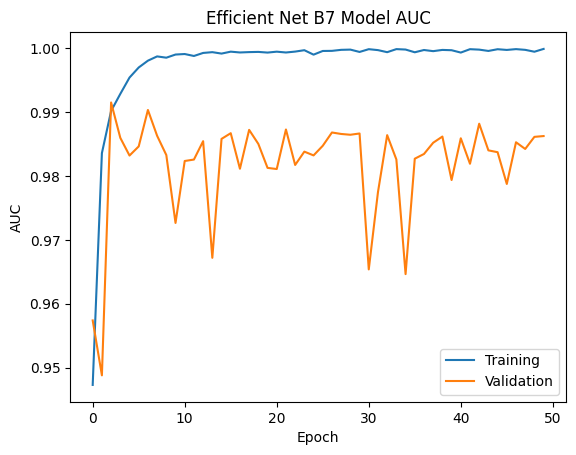

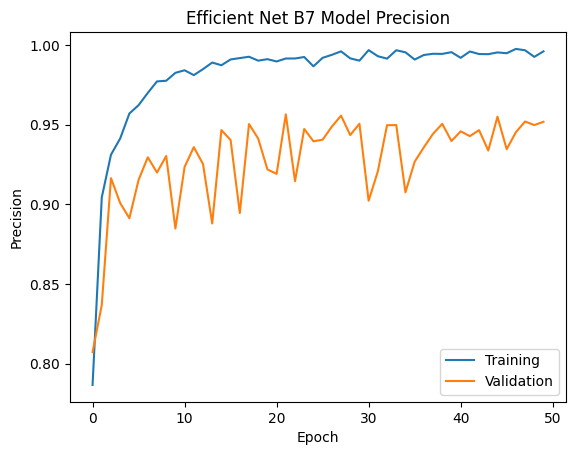

In [ ]:
# Plot the training and validation auc
plt.plot(history2['auc'])
plt.plot(history2['val_auc'])
plt.title('Efficient Net B7 Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('netb7_auc.png', dpi=300) # Save plot as PNG

plt.show()

# Plot the training and validation precision
plt.plot(history2['precision'])
plt.plot(history2['val_precision'])
plt.title('Efficient Net B7 Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('netb7_precision.png', dpi=300) # Save plot as PNG
plt.show()

Resnet50


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
rn = ResNet50(input_shape=(150,150,3), weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in rn.layers:
    layer.trainable = False
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model4 = Sequential()
model4.add(rn)
model4.add(Flatten())
model4.add(Dense(5,activation="softmax"))
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 5)                 256005    
                                                                 
Total params: 23,843,717
Trainable params: 256,005
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model4.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [ ]:
history4=model4.fit(Xtrain,Ytrain,epochs=50,validation_data=(Xtest,Ytest))

Epoch 1/50
479/479 [==============================] - 35s 65ms/step - loss: 2.7463 - accuracy: 0.8935 - precision: 0.7340 - recall: 0.7329 - auc: 0.8994 - val_loss: 4.0541 - val_accuracy: 0.8645 - val_precision: 0.6616 - val_recall: 0.6598 - val_auc: 0.8415
Epoch 2/50
479/479 [==============================] - 30s 63ms/step - loss: 1.2190 - accuracy: 0.9285 - precision: 0.8214 - recall: 0.8211 - auc: 0.9448 - val_loss: 1.7602 - val_accuracy: 0.9042 - val_precision: 0.7610 - val_recall: 0.7592 - val_auc: 0.9149
Epoch 3/50
479/479 [==============================] - 30s 63ms/step - loss: 0.8386 - accuracy: 0.9533 - precision: 0.8833 - recall: 0.8829 - auc: 0.9669 - val_loss: 3.8095 - val_accuracy: 0.8703 - val_precision: 0.6759 - val_recall: 0.6753 - val_auc: 0.8544
Epoch 4/50
479/479 [==============================] - 29s 60ms/step - loss: 0.7868 - accuracy: 0.9550 - precision: 0.8875 - recall: 0.8875 - auc: 0.9675 - val_loss: 0.6233 - val_accuracy: 0.9585 - val_precision: 0.8969 - val_r

In [ ]:
import pandas as pd

# Assuming 'history1' is the History object returned from model.fit()
metrics = pd.DataFrame(history4.history)

# Save the training history to a CSV file
metrics.to_csv('/content/sample_data/RES_FINAL2.csv', index=False)

# Save the model itself
model.save('/content/sample_data/RES_FINAL2.h5')



In [ ]:
pred4 = model4.predict(Xtest)
pred4 = np.argmax(pred4, axis=1)
actual_label4 = np.argmax(Ytest, axis=1)
print(classification_report(actual_label4, pred4 , target_names = labels_final))

81/81 [==============================] - 5s 47ms/step
              precision    recall  f1-score   support

          AD       0.92      1.00      0.96       810
          CN       1.00      0.95      0.97      1220
        EMCI       1.00      1.00      1.00       240
        LMCI       1.00      1.00      1.00        72
         MCI       1.00      0.94      0.97       233

    accuracy                           0.97      2575
   macro avg       0.98      0.98      0.98      2575
weighted avg       0.97      0.97      0.97      2575



In [ ]:
accuracy_score(actual_label4, pred4)

0.9700970873786408

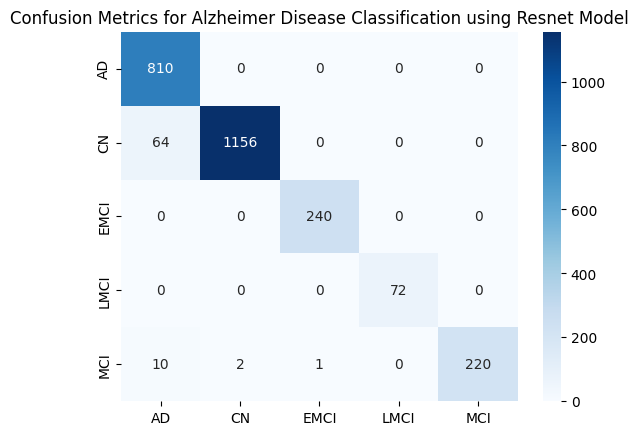

In [ ]:
Cm4=confusion_matrix(actual_label4,pred4)
ax4=plt.axes()
sns.heatmap(Cm4, cmap='Blues' ,annot=True,fmt='d',
           annot_kws={'size':10},
           xticklabels=labels_final,
           yticklabels=labels_final,
           ax=ax4
           )

plt.title("Confusion Metrics for Alzheimer Disease Classification using Resnet Model")
plt.savefig('Resnet_confusion.png', dpi=300) # Save plot as PNG
plt.show()

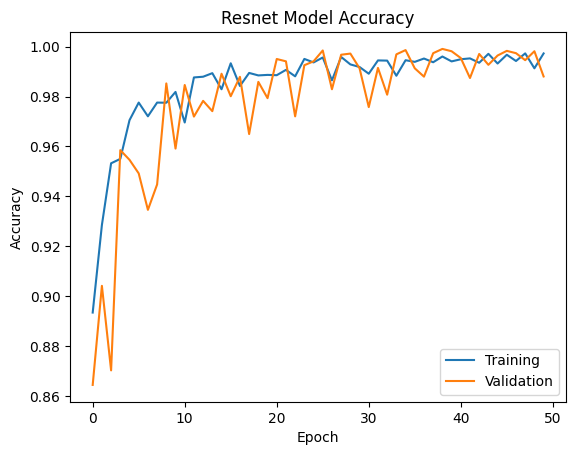

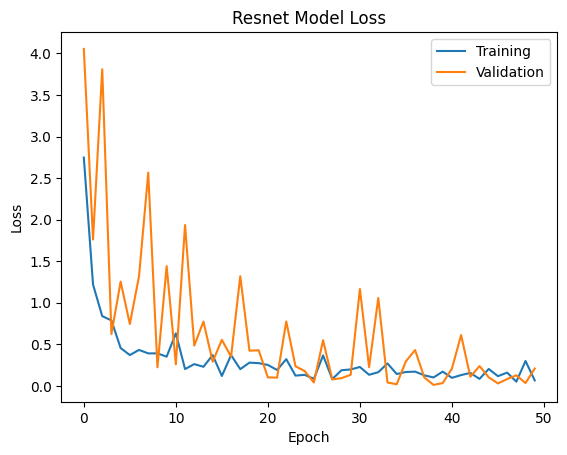

In [ ]:
# Plot the training and validation accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Resnet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.savefig('resnet_accuracy.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Resnet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.savefig('Resnet_loss.png', dpi=300) # Save plot as PNG
plt.show()

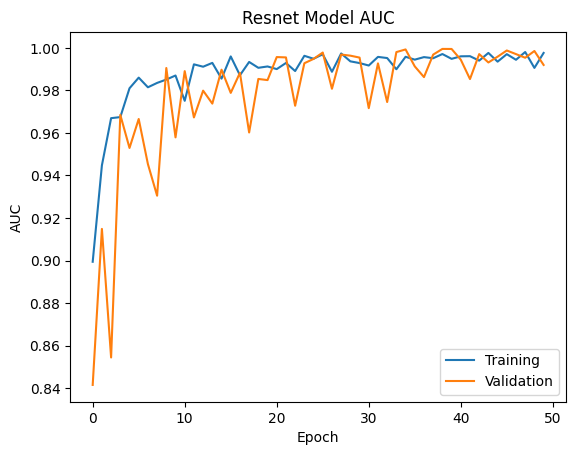

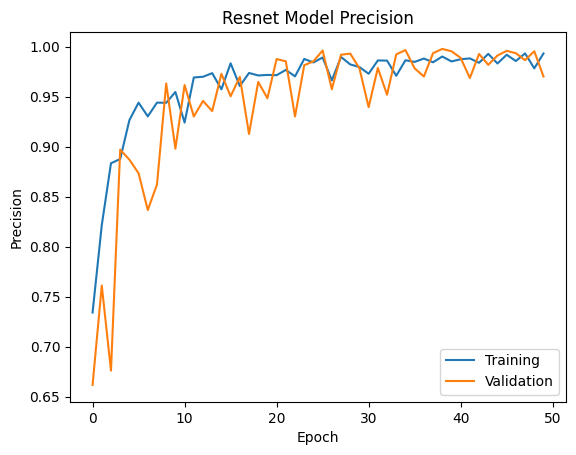

In [ ]:
# Plot the training and validation auc
plt.plot(history4.history['auc'])
plt.plot(history4.history['val_auc'])
plt.title('Resnet Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation'])
plt.savefig('Resnet_auc.png', dpi=300) # Save plot as PNG
plt.show()

# Plot the training and validation precision
plt.plot(history4.history['precision'])
plt.plot(history4.history['val_precision'])
plt.title('Resnet Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training', 'Validation'])
plt.savefig('Resnet_precision.png', dpi=300) # Save plot as PNG
plt.show()

Comparision Graph of Different Models

In [ ]:
scores  = model.evaluate(Xtest, Ytest, verbose=1)
scores1 = cnn.evaluate(Xtest, Ytest, verbose=1)
scores2 = model2.evaluate(Xtest, Ytest, verbose=1)
scores3 = model3.evaluate(Xtest, Ytest, verbose=1)
scores4 = model4.evaluate(Xtest, Ytest, verbose=1)


81/81 [==============================] - 4s 53ms/step - loss: 0.2084 - accuracy: 0.9880 - precision: 0.9701 - recall: 0.9701 - auc: 0.9920


Densenet


In [ ]:
precision = scores[0]
f1_score = scores[1]
recall = scores[2]
accuracy = scores[3]

CNN

In [ ]:
precision1 = scores1[0]
f1_score1 = scores1[1]
recall1 = scores1[2]
accuracy1 = scores1[3]

EfficientNetB7

In [ ]:
precision2 = scores2[0]
f1_score2 = scores2[1]
recall2 = scores2[2]
accuracy2 = scores2[3]

In [ ]:
Resnet 50


RESNET50


In [ ]:
precision4 = scores4[0]
f1_score4 = scores4[1]
recall4 = scores4[2]
accuracy4 = scores4[3]

In [ ]:
import pandas as pd

eval_df = pd.DataFrame(columns=['Model','Precision', 'F1 Score', 'Recall', 'Accuracy'])


In [ ]:
eval_df = eval_df.append({'Model' : 'Densenet', 'Precision': precision, 'F1 Score': f1_score, 'Recall': recall, 'Accuracy': accuracy}, ignore_index=True)
eval_df = eval_df.append({'Model' : 'CNN', 'Precision': precision1, 'F1 Score': f1_score1, 'Recall': recall1, 'Accuracy': accuracy1}, ignore_index=True)
eval_df = eval_df.append({'Model' : 'Efficient Net B7', 'Precision': precision2, 'F1 Score': f1_score2, 'Recall': recall2, 'Accuracy': accuracy2}, ignore_index=True)
#eval_df = eval_df.append({'Model' : 'VGG 19', 'Precision': precision3, 'F1 Score': f1_score3, 'Recall': recall3, 'Accuracy': accuracy3}, ignore_index=True)
eval_df = eval_df.append({'Model' : 'Resnet50', 'Precision': precision4, 'F1 Score': f1_score4, 'Recall': recall4, 'Accuracy': accuracy4}, ignore_index=True)

<ipython-input-88-9dc09adc825d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'Model' : 'Densenet', 'Precision': precision, 'F1 Score': f1_score, 'Recall': recall, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-88-9dc09adc825d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'Model' : 'CNN', 'Precision': precision1, 'F1 Score': f1_score1, 'Recall': recall1, 'Accuracy': accuracy1}, ignore_index=True)
<ipython-input-88-9dc09adc825d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'Model' : 'Efficient Net B7', 'Precision': precision2, 'F1 Score': f1_score2, 'Recall': recall2, 'Accuracy': accuracy2}, ignore_index=True)
<ipython-input-88

In [ ]:
eval_df

,Model,Precision,F1 Score,Recall,Accuracy
0,Densenet,0.030428,0.995495,0.989498,0.987961
1,CNN,0.011166,0.998447,0.996888,0.995340
2,Efficient Net B7,0.201293,0.984000,0.962876,0.956893
3,Resnet50,0.208394,0.988039,0.970097,0.970097


In [ ]:
import csv
eval_df.to_csv('comparison_metrics.csv', index=False)

Ensemble

In [ ]:
pred = model.predict(Xtest)
pred1=cnn.predict(Xtest)
pred2 = model2.predict(Xtest)
pred4=model4.predict(Xtest)
ensemble_preds = np.average([pred ,pred1 ,pred2 ,pred4], axis=0)
final_preds = np.argmax(ensemble_preds, axis=1)
actual_label_final = np.argmax(Ytest, axis=1)
print(classification_report(actual_label_final, final_preds,target_names = labels_final))
accuracy_score(actual_label_final, final_preds)

81/81 [==============================] - 4s 48ms/step
              precision    recall  f1-score   support

          AD       1.00      1.00      1.00       810
          CN       1.00      1.00      1.00      1220
        EMCI       1.00      1.00      1.00       240
        LMCI       1.00      1.00      1.00        72
         MCI       1.00      1.00      1.00       233

    accuracy                           1.00      2575
   macro avg       1.00      1.00      1.00      2575
weighted avg       1.00      1.00      1.00      2575



0.9996116504854369